In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from copy import copy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import f1_score
from sklearn import ensemble
from sklearn import svm

# Importação dos dados

In [2]:
df = pd.read_csv('../datasets/airline_passenger_satisfaction.csv').drop('ID',axis=1)

# Analisando os dados

## Apresentando os dados

In [3]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.shape

(129880, 23)

In [5]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


In [6]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Buscando correlaçes entre as features

In [7]:
df.corr()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099459,-0.009041,-0.011248,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.099459,1.000000,0.002402,-0.001935,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,-0.009041,0.002402,1.000000,0.965291,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,0.036960,-0.018914,0.000778,-0.000942,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.022565,0.065165,-0.005318,-0.007033,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.033475,0.073608,-0.018752,-0.021705,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.207572,0.214825,-0.019404,-0.022730,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,-0.000398,0.005520,0.005973,0.005658,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972
On-board Service,0.057078,0.111194,-0.030486,-0.034789,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,0.130545,0.357721,0.122084,0.057404,0.551569,0.119928,0.418574,0.520296


### encontramos que as colunas Departure Delay e Arrival Delay estão fortemente correlacionadas

## Buscando por valores faltantes

In [8]:
for col in df.columns:
 if not df[col][pd.isna(df[col])].empty:
   print(col)

Arrival Delay


### Vemos que apenas a feature Arrival Delay possui valores faltantes, e como já sabemos que ela está correlacionada com outra feature, remové-la-emos

In [9]:
df.drop('Arrival Delay', axis=1, inplace=True)

# Preprocessamento

## Separando features de label

In [10]:
X = df.iloc[:10000,:-1]
y = df['Satisfaction'].values[:10000]

## Alterando label de string para valores discretos

In [11]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ['Gender','Customer Type','Type of Travel','Class']),
], remainder='passthrough')
#X = preprocessor.fit_transform(X)

In [12]:
ord_enc = OrdinalEncoder()
features_ord = ord_enc.fit_transform(y.reshape(-1,1))
y = features_ord.ravel()

# Separando em treino e teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80/100, random_state=42, stratify=y)

In [14]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# inicializando modelos preditivos

In [15]:
pred_models = {
    'rf': ensemble.RandomForestClassifier(n_jobs=-1, random_state=42),
    'gb': ensemble.GradientBoostingClassifier(random_state=42),
    'svm': svm.SVC(random_state=42),
}

In [16]:
res_train = {}
res_test = {}
res_esc_train = {}
res_esc_test = {}

# Treinando modelos sem escalonamento de features

In [17]:
for k,m in pred_models.items():
  if k == 'rf':
    param_grid = {
      'n_estimators': [80,100,120,130,140],
      'max_depth': [None,20,50],
      'min_samples_split': [2,3,4],
      'min_samples_leaf': [1,2,3]}
  elif k == 'gb':
    param_grid = {
      'learning_rate': [0.05,0.1,0.15,0.2],
      'n_estimators': [100,130,140,150],
      'max_depth': [2,5,8,10]}
  else:
     param_grid = {'C': [0.1, 1, 10, 100, 200, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

  grid_search = GridSearchCV(copy(m), param_grid, scoring='f1',
                           cv=3, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  best_pa = grid_search.best_params_
  y_pred_train = grid_search.predict(X_train)
  y_pred_test = grid_search.predict(X_test)
  train_score = f1_score(y_train, y_pred_train)
  test_score = f1_score(y_test, y_pred_test)
  
  res_train[k] = train_score
  res_test[k] = test_score
  
  print(k)
  print(best_pa)
  print(train_score)
  print(test_score)

rf
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
1.0
0.9569321533923303
gb
{'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 100}
1.0
0.9606114050558496
svm
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9127055306427505
0.8467595396729255


# Reinstanciando X

In [18]:
X = df.iloc[:10000,:-1]

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ['Gender','Customer Type','Type of Travel','Class']),
], remainder='passthrough')
standardize = ColumnTransformer(transformers=[
    ('std', StandardScaler(), [x for x in range(9,26)]),
], remainder='passthrough')

In [20]:
pipe = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('standardize', standardize)
  ])

In [21]:
# X = pipe.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80/100, random_state=42, stratify=y)

In [23]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

# Treinando modelos com escalonamento de features

In [24]:
for k,m in pred_models.items():
  if k == 'rf':
    param_grid = {
      'n_estimators': [80,100,120,130,140],
      'max_depth': [None,20,50],
      'min_samples_split': [2,3,4],
      'min_samples_leaf': [1,2,3]}
  elif k == 'gb':
    param_grid = {
      'learning_rate': [0.05,0.1,0.15,0.2],
      'n_estimators': [100,130,140,150],
      'max_depth': [2,5,8,10]}
  else:
     param_grid = {'C': [0.1, 1, 10, 100, 200,1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

  grid_search = GridSearchCV(copy(m), param_grid, scoring='f1',
                           cv=3, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  best_pa = grid_search.best_params_
  y_pred_train = grid_search.predict(X_train)
  y_pred_test = grid_search.predict(X_test)
  train_score = f1_score(y_train, y_pred_train)
  test_score = f1_score(y_test, y_pred_test)
  
  res_esc_train[k] = train_score
  res_esc_test[k] = test_score
  
  print(k)
  print(best_pa)
  print(train_score)
  print(test_score)

rf
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
1.0
0.9586776859504131
gb
{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 150}
1.0
0.95929203539823
svm
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.969165570656145
0.9519343493552169


# Resultados

In [25]:
res_train_df = pd.DataFrame.from_dict(res_train, orient='index', columns=['treino sem escalonamento'])
res_test_df = pd.DataFrame.from_dict(res_test, orient='index', columns=['teste sem escalonamento'])
res_esc_train_df = pd.DataFrame.from_dict(res_esc_test, orient='index', columns=['treino escalonado'])
res_esc_test_df = pd.DataFrame.from_dict(res_esc_test, orient='index', columns=['teste escalonado'])

In [26]:
df_res = pd.concat([res_train_df,res_test_df,res_esc_train_df,res_esc_test_df], axis=1)

In [27]:
df_res

,treino sem escalonamento,teste sem escalonamento,treino escalonado,teste escalonado
rf,1.000000,0.956932,0.958678,0.958678
gb,1.000000,0.960611,0.959292,0.959292
svm,0.912706,0.846760,0.951934,0.951934


<AxesSubplot:>

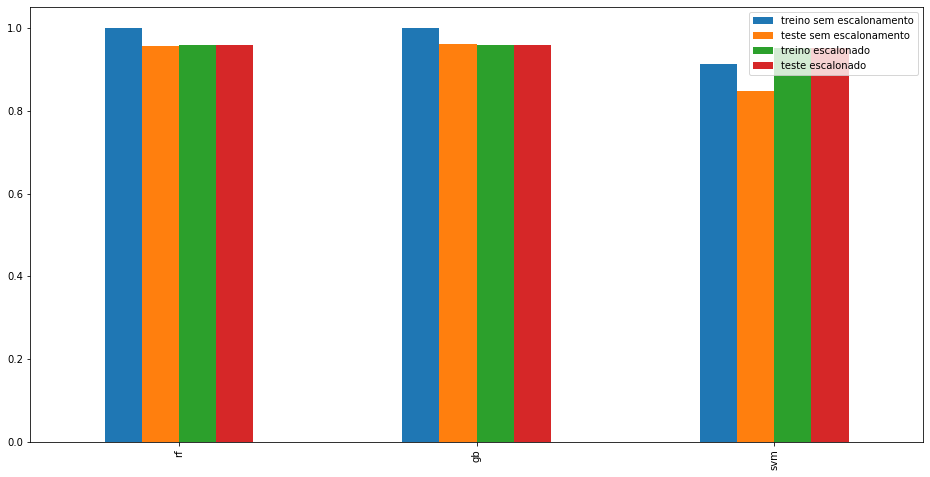

In [28]:
df_res.plot(kind='bar', figsize=(16,8))